# 🧚🏻‍♂️ Variance Analysis / One-Way ANOVA
This hypothesis is used to test whether there is a statistically significant difference between the averages of two or more groups.

**Hypotheses**

$H0 : \mu_1 = \mu_2 = \dots = \mu_k$ (all group means are equal)  
$H1 : \text{At least one group mean is different}$

**Test Statistic (F-ratio)**
  
$F = \frac{\text{Mean Square Between Groups (MSB)}}{\text{Mean Square Within Groups (MSW)}}$

where:

- $\text{MSB} = \frac{\text{Sum of Squares Between Groups (SSB)}}{k - 1}$  
- $\text{MSW} = \frac{\text{Sum of Squares Within Groups (SSW)}}{N - k}$

and:

- $\text{SSB} = \sum_{i=1}^{k} n_i (\bar{X}_i - \bar{X})^2$  
- $\text{SSW} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2$

**Assumptions:**
- Independence: Observations are independent.  
- Normality: Each group is approximately normally distributed.  
- Homogeneity of variances: Variances across groups are approximately equal. 

---


**Problem**: A news site has three different types of news articles: A (Natural), B (Manipulative), and C (Attention-Grabbing). Success factors include average visit duration, bounce rate, etc. Based on this, they want us to test which news type is more successful in terms of success factors.

#### » Import the necessary data libraries and create arrays to simulate the problem

In [1]:
import numpy as np
import pandas as pd
A = pd.DataFrame(np.random.normal(loc=30,scale=10,size=20).astype(int))
B = pd.DataFrame(np.random.normal(loc=38,scale=5,size=20).astype(int))
C = pd.DataFrame(np.random.normal(loc=35,scale=10,size=20).astype(int))

#### » Combine all groups for easy testing

In [2]:
ABC = pd.concat([A,B,C], axis=1)
ABC.columns = ["group_A", "group_B", "group_C"]
ABC.head()

,group_A,group_B,group_C
0,37,38,34
1,35,36,33
2,29,41,27
3,25,45,27
4,29,42,36


### Normality Assumption
##### H0: There is no difference between the sample distribution and the theoretical normal distribution.(Normally distributed)
##### H1: There is difference "

In [3]:
from scipy.stats import shapiro
shapiro(ABC.group_A)

ShapiroResult(statistic=np.float64(0.9616385155082497), pvalue=np.float64(0.5770795079448837))

In [4]:
shapiro(ABC.group_B)

ShapiroResult(statistic=np.float64(0.9599339261651165), pvalue=np.float64(0.5425299202266034))

In [5]:
shapiro(ABC.group_C)

ShapiroResult(statistic=np.float64(0.9556537280034006), pvalue=np.float64(0.46106797250962933))

Based on the results above, all pvalues are greater than 0.05 so H0 can not be rejected. The assumption has been confirmed.

### Variance Homogenity Assumption
##### H0: Variances are homogen
##### H1: Variances is not homogen

In [7]:
from scipy.stats import levene
levene(ABC.group_A, ABC.group_B, ABC.group_C)

LeveneResult(statistic=np.float64(3.0118395088796337), pvalue=np.float64(0.05709215896212818))

Based on the results above, since the pvalue is greater than 0.05, H0 can not rejected. The assumption has been confirmed.

### Hypothesis Test
##### $H0 : \mu_1 = \mu_2 = \dots = \mu_k$ (all group means are equal)  
##### $H1 : \text{At least one group mean is different}$

In [9]:
from scipy.stats import f_oneway
f_oneway(ABC.group_A, ABC.group_B, ABC.group_C)

F_onewayResult(statistic=np.float64(4.877405667525383), pvalue=np.float64(0.011083580023243273))

Based on the results above, since the pvalue lower than 0.05, H0 is rejected and thats mean there is at least one difference between all three types we can draw a boxplot to observe the more succesful type.

#### » Visualize the data with boxplot to see the overall observation

<Axes: >

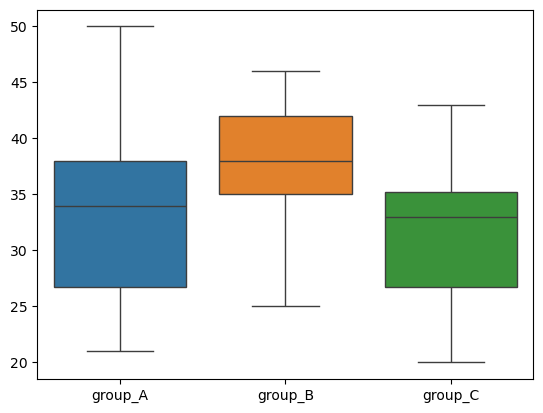

In [10]:
import seaborn as sns
sns.boxplot(ABC)

#### » Show the statisctic of data to see the more detailed information about the types

In [125]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
group_A,20.0,25.45,9.046517,12.0,18.75,24.5,30.75,49.0
group_B,20.0,39.15,4.637093,32.0,35.75,39.0,43.00,49.0
group_C,20.0,32.20,11.678140,7.0,28.75,33.5,38.00,55.0


### ! If assumptions hadn't been confirmed, Non-parametric Hypothesis Test would have been used. 

#### » Import "kruskal" which used for a non-parametric hypothesis test

In [12]:
from scipy.stats import kruskal
kruskal(ABC.group_A, ABC.group_B, ABC.group_C)

KruskalResult(statistic=np.float64(9.274240055826937), pvalue=np.float64(0.00968555161722935))